In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct

print(ct.__file__)
print(ct.__version__)

plt.rcParams['figure.constrained_layout.use'] = True
%matplotlib widget

/home/avcopan/code/other/cantera-workshop/.pixi/envs/default/lib/python3.13/site-packages/cantera/__init__.py
3.1.0


## Mechanism files & basic info

https://github.com/Cantera/cantera/blob/main/data/gri30.yaml

In [2]:
gas = ct.Solution("gri30.yaml")

In [4]:
gas.n_species, gas.n_reactions

(53, 325)

In [5]:
print(gas.species_names)

['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO', 'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3', 'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2', 'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN', 'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO', 'CH3CHO']


## Species thermo data

NASA 7-coefficient polynomials:

$$   \frac{\hat{c}_p^\circ(T)}{\overline{R}} = a_0 + a_1 T + a_2 T^2 + a_3 T^3 + a_4 T^4 $$

$$   \frac{\hat{h}^\circ (T)}{\overline{R} T} = a_0 + \frac{a_1}{2} T + \frac{a_2}{3} T^2 +
                         \frac{a_3}{4} T^3 + \frac{a_4}{5} T^4 + \frac{a_5}{T} $$

$$   \frac{\hat{s}^\circ(T)}{\overline{R}} = a_0 \ln T + a_1 T + \frac{a_2}{2} T^2 + \frac{a_3}{3} T^3 +
                      \frac{a_4}{4} T^4 + a_6 $$

In [6]:
CH4 = gas.species("CH4")
CH4.thermo.input_data

{'model': 'NASA7',
 'temperature-ranges': [200.0, 1000.0, 3500.0],
 'data': [[5.14987613,
   -0.0136709788,
   4.91800599e-05,
   -4.84743026e-08,
   1.66693956e-11,
   -10246.6476,
   -4.64130376],
  [0.074851495,
   0.0133909467,
   -5.73285809e-06,
   1.22292535e-09,
   -1.0181523e-13,
   -9468.34459,
   18.437318]],
 'note': 'L8/88'}

In [11]:
Ts = np.linspace(300, 2000, 200)
cp = [CH4.thermo.cp(T) for T in Ts]

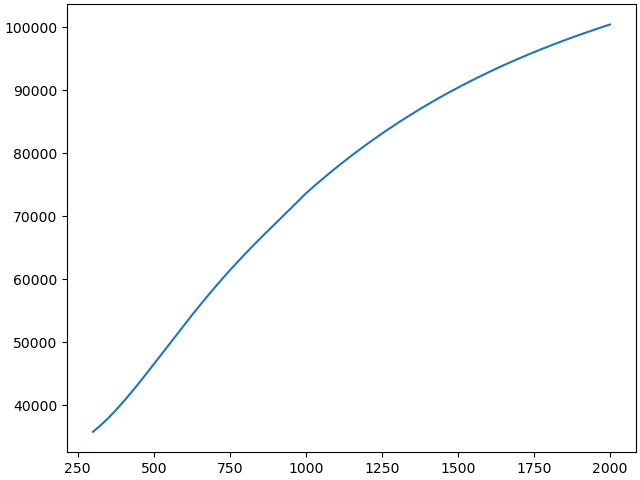

In [12]:
fig, ax = plt.subplots()
ax.plot(Ts, cp)

In [10]:
gas()


  gri30:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.081894 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             26469             53361  J
   internal energy       -1.2108e+06        -2.441e+06  J
           entropy             64910        1.3086e+05  J/K
    Gibbs function       -1.9447e+07       -3.9204e+07  J
 heat capacity c_p             14311             28851  J/K
 heat capacity c_v             10187             20536  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -15.717
     [  +52 minor]                 0                 0  



## Setting thermodynamic state
- Always requires two variables, e.g. $(T, P)$ or $(T, v)$ or $(s, P)$ etc.
- Specify `None` to hold a property constant

https://cantera.org/documentation/docs-3.0/sphinx/html/cython/thermo.html#thermophase

In [13]:
gas.TP = 500, ct.one_atm
gas()


  gri30:

       temperature   500 K
          pressure   1.0132e+05 Pa
           density   0.049136 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        2.9243e+06        5.8955e+06  J
   internal energy        8.6222e+05        1.7382e+06  J
           entropy             72307        1.4577e+05  J/K
    Gibbs function       -3.3229e+07        -6.699e+07  J
 heat capacity c_p             14533             29298  J/K
 heat capacity c_v             10408             20983  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -16.114
     [  +52 minor]                 0                 0  



In [15]:
gas.SP = None, 2 * ct.one_atm  # keep entropy constant while changing pressure
gas()


  gri30:

       temperature   608.81 K
          pressure   2.0265e+05 Pa
           density   0.080709 kg/m^3
  mean mol. weight   2.016 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        4.5041e+06        9.0802e+06  J
   internal energy        1.9932e+06        4.0183e+06  J
           entropy             72307        1.4577e+05  J/K
    Gibbs function       -3.9517e+07       -7.9666e+07  J
 heat capacity c_p             14512             29255  J/K
 heat capacity c_v             10387             20941  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2                 1                 1           -15.738
     [  +52 minor]                 0                 0  



In [17]:
gas.s

72307.09034601053

## Setting composition
- Main ways are by setting either mass fractions ($Y$) or mole fractions ($X$)
- Can be set alone (in which case $(T,\rho)$ held constant), or with a valid property pair
- Mass/mole fractions are automatically normalized to 1.0
- Can also set equivalence ratio

In [20]:
gas.TPX = 300, ct.one_atm, {"H2": 1.0, "O2": 1.5} # mole fractions are automatically normalized
gas()


  gri30:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   0.81265 kg/m^3
  mean mol. weight   20.005 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy            2697.3             53959  J
   internal energy       -1.2199e+05       -2.4404e+06  J
           entropy            9054.5        1.8114e+05  J/K
    Gibbs function       -2.7137e+06       -5.4287e+07  J
 heat capacity c_p            1458.3             29173  J/K
 heat capacity c_v            1042.7             20859  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2           0.04031               0.4           -16.634
                O2           0.95969               0.6           -25.185
     [  +51 minor]                 0                 0  



In [ ]:
X = np.zeros(gas.n_species)
X[9:14] = 1.0
gas.X = X  # If we just change composition, temperature and density will change
gas()


  gri30:

       temperature   300 K
          pressure   1.4047e+05 Pa
           density   0.81265 kg/m^3
  mean mol. weight   14.43 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        2.0681e+07        2.9844e+08  J
   internal energy        2.0508e+07        2.9594e+08  J
           entropy             13880        2.0029e+05  J/K
    Gibbs function        1.6517e+07        2.3835e+08  J
 heat capacity c_p            2387.4             34450  J/K
 heat capacity c_v            1811.2             26136  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                CH           0.18044               0.2            216.18
               CH2           0.19441               0.2            132.62
            CH2(S)           0.19441               0.2            148.31


In [22]:
gas.TPY = None, None, "CH4:1.0, N2:3"
gas()


  gri30:

       temperature   300 K
          pressure   1.4047e+05 Pa
           density   1.3296 kg/m^3
  mean mol. weight   23.61 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy         -1.16e+06       -2.7387e+07  J
   internal energy       -1.2656e+06       -2.9881e+07  J
           entropy            8156.3        1.9257e+05  J/K
    Gibbs function       -3.6069e+06       -8.5158e+07  J
 heat capacity c_p            1335.7             31535  J/K
 heat capacity c_v            983.52             23221  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
               CH4              0.25           0.36791           -52.996
                N2              0.75           0.63209           -23.165
     [  +51 minor]                 0                 0  



In [ ]:
gas.TP = 500, 10 * ct.one_atm
gas.set_equivalence_ratio(0.5, "CH4:1.0", "O2:1, N2:3.76")  # Set using current temperature and pressure of gas
gas.set_equivalence_ratio(0.5, {"CH4":1.0}, {"O2":1, "N2":3.76})  # Can use dictionaries
gas()


  gri30:

       temperature   500 K
          pressure   1.0132e+06 Pa
           density   6.8761 kg/m^3
  mean mol. weight   28.212 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             83163        2.3462e+06  J
   internal energy            -64195       -1.8111e+06  J
           entropy            6949.4        1.9605e+05  J/K
    Gibbs function       -3.3915e+06       -9.5681e+07  J
 heat capacity c_p            1090.5             30766  J/K
 heat capacity c_v            795.82             22452  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22639            0.1996           -24.389
               CH4          0.028376            0.0499            -41.58
                N2           0.74524            0.7505           -21.416


## Flame temperature calculation

With a guest appearance by the `SolutionArray` class.

In [30]:
phis = np.linspace(0.4, 3.0, 100)
Tad = []
T0 = 300
P0 = ct.one_atm
fuel = "C2H6: 1.0"

for phi in phis:
    gas.TP = T0, P0
    gas.set_equivalence_ratio(phi, fuel, "O2:1.0, N2:3.76")
    gas.equilibrate("HP")  # Equilibrate at constant enthalpy and pressure
    Tad.append(gas.T)

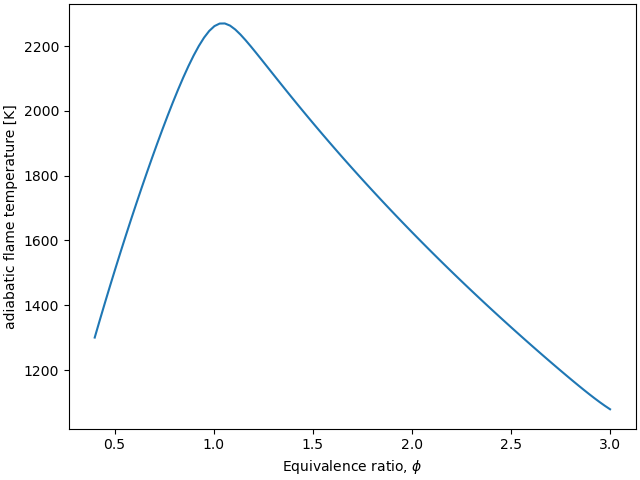

In [29]:
fig, ax = plt.subplots()
ax.plot(phis, Tad)
ax.set(xlabel="Equivalence ratio, $\\phi$", ylabel="adiabatic flame temperature [K]");

In [32]:
states = ct.SolutionArray(gas, len(phis))  # Allows you to AVOID the for loop above!!
states.Y.shape

(100, 53)

In [ ]:
states.TP = T0, P0  # single values get broadcast to all
states.set_equivalence_ratio(phis, fuel, "O2:1.0, N2:3.76")  # phi array gets applied element-wise
states.equilibrate("HP")

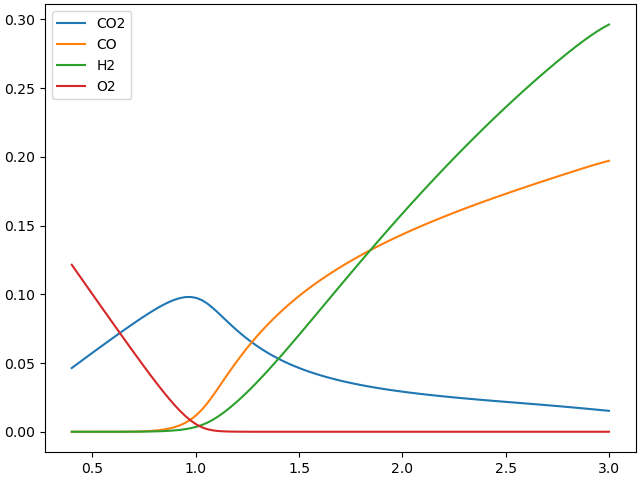

In [35]:
fig, ax = plt.subplots()
species = ['CO2', 'CO', 'H2', 'O2']
ax.plot(phis, states(*species).X, label=species)
ax.legend()

## Kinetics & Reactions

https://cantera.org/documentation/docs-3.0/sphinx/html/cython/kinetics.html#kinetics

In [36]:
R = gas.reaction(1)
R

H + O + M <=> OH + M    <three-body-Arrhenius>

In [38]:
R.rate.pre_exponential_factor

500000000000.0001

In [39]:
R.reactants

{'H': 1.0, 'O': 1.0}

In [ ]:
gas.forward_rate_constants[1]  # .forward_rate_constants is an array of all 325 rate constants in the model

np.float64(463267342.3999107)

In [42]:
gas.net_rates_of_progress[1]  # Near zero because we set the Solution to an equilibrium state

np.float64(-3.397913357845675e-39)

## Defining reactions & exploring equilibrium

$$ a \mathrm{A} + b \mathrm{B} \rightleftharpoons c \mathrm{C} + d \mathrm{D} $$

$$ \Delta_r^\circ \hat{g} = \Delta_r^\circ \hat{h} - T \Delta_r^\circ \hat{s}$$

$$ K_c = \frac{k_f}{k_r} = \frac{[\mathrm{C}]^c [\mathrm{D}]^d}{[\mathrm{A}]^a [\mathrm{B}]^b} = \exp\left( \frac{\Delta_r^\circ \hat{g}}{RT} \right) \left( \frac{p^o}{RT}\right)^{\nu_{net}} $$

In [46]:
# Can define global reactions and get effective rates (?)
R1 = ct.Reaction(equation="CO + O = CO2", rate=ct.Arrhenius(0.0, 0.0, 0.0))
R2 = ct.Reaction(equation="H + OH = H2O", rate=ct.Arrhenius(0.0, 0.0, 0.0))

gas.add_reaction(R1)
gas.add_reaction(R2)
gas.n_reactions

329

In [47]:
i1 = gas.n_reactions - 2
i2 = gas.n_reactions - 1

T = np.linspace(300, 2500, 500)
states = ct.SolutionArray(gas, len(T))
states.TPX = T, ct.one_atm, {"CO2": 1, "H2O": 1.0, "N2": 3.76, "O2": 1.0}

dh0 = states.delta_standard_enthalpy[:, [i1, i2]]
ds0 = states.delta_standard_entropy[:, [i1, i2]]
Kc = states.equilibrium_constants[:, [i1, i2]]

Kc.shape

(500, 2)

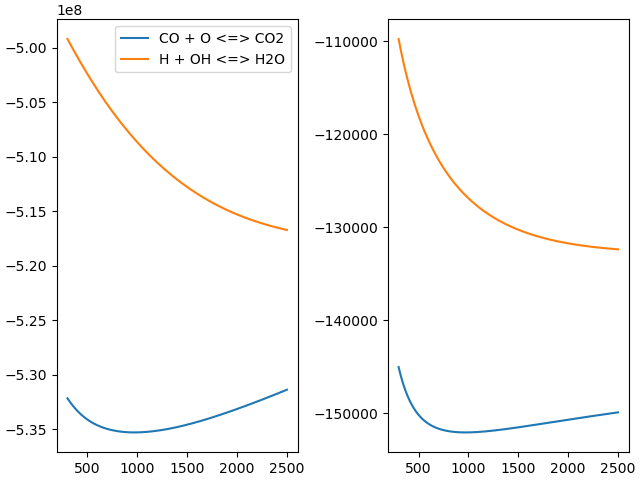

In [48]:
fig, ax = plt.subplots(1,2)
ax[0].plot(T, dh0)
ax[1].plot(T, ds0)
ax[0].legend([R1.equation, R2.equation])

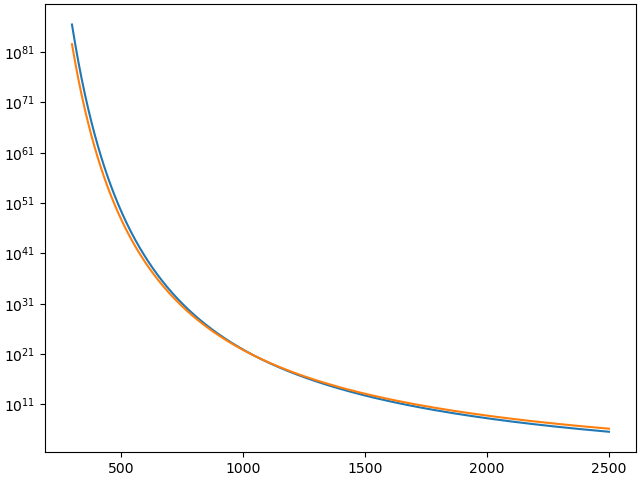

In [49]:
fig, ax = plt.subplots()
ax.semilogy(T, Kc)